In [1]:
import re
import nltk
import bs4 as bs   
import uuid
# from extract_ppt import ppt_to_text
import urllib.request
# import datetime
# import random
# from firebase import firebase
import pandas as pd
import matplotlib.pyplot as pyplot

# firebase = firebase.FirebaseApplication('https://reddys-4fd1a.firebaseio.com', None)

class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

opener = AppURLopener()
# article_text = ppt_to_text()
articles = {"Respiratory": ['https://www.everydayhealth.com/drugs/acetylcysteine',
            'https://www.empr.com/drug/acetylcysteine-solution-for-inhalation/',
            'https://en.wikipedia.org/wiki/Acetylcysteine',
            'https://dailymed.nlm.nih.gov/dailymed/fda/fdaDrugXsl.cfm?setid=5558a5f5-e821-473b-7d8a-5d33d09f0586&type=display',
            'https://www.empr.com/drug/acetylcysteine-solution-for-inhalation/',
            'https://www.webmd.com/lung/breathing-problems-causes-tests-treatments#1'
            'https://www.healthline.com/health/home-treatments-for-shortness-of-breath', 'https://prowersmedical.com/solutions-for-lung-disease-and-breathing-problems/',
            'https://www.practo.com/medicine-info/ambroxol-530-api', 'https://en.wikipedia.org/wiki/Ambroxol', 'https://clinicaltrials.gov/ct2/show/NCT03415269',
            'https://en.wikipedia.org/wiki/Cetirizine', 'https://www.who.int/csr/disease/coronavirus_infections/faq/en/','https://www.cdc.gov/healthcommunication/toolstemplates/entertainmented/tips/ChronicRespiratoryDisease.html',
            'https://www.webmd.com/lung/copd/10-faqs-about-living-with-copd#1',
            'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2876696/','https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5709795/',
            'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5455070/',
            'https://www.health.harvard.edu/mind-and-mood/relaxation-techniques-breath-control-helps-quell-errant-stress-response',
            'https://emmaseppala.com/benefits-breathing-scientific-benefits-breathing-infographic/',
            'https://blog.bulletproof.com/breathing-sharpens-brain-study/',
            'https://www.nytimes.com/2018/11/20/well/mind/breathing-through-the-nose-may-offer-unique-brain-benefits.html',
            'https://www.livescience.com/22616-respiratory-system.html'],
            "Dermatology": ['https://www.practo.com/medicine-info/aciclovir-6-api',
                            'https://en.wikipedia.org/wiki/Aciclovir',
                            'https://www.medicines.org.uk/emc/product/4334/smpc',
                            'http://www.dermatologist.org.uk/dermatology-faqs.html',
                            'https://www.webmd.com/skin-problems-and-treatments/guide/skin-problems-treatments-symptoms-types',
                            'https://www.webmd.com/drugs/2/drug-3841-787/miconazole-nitrate-topical/miconazole-topical/details',
                            'https://en.wikipedia.org/wiki/Miconazole','https://www.practo.com/medicine-info/miconazole-2-cream-25192',
                            'https://en.wikipedia.org/wiki/Clotrimazole','https://www.drugs.com/cdi/clotrimazole-cream-ointment-and-solution.html',
                            'https://aidsinfo.nih.gov/drugs/474/clotrimazole/0/patient'],
            "AntiInfective": ['https://www.drugs.com/drug-class/anti-infectives.html',
                                'https://www.practo.com/medicine-info/aciclovir-6-api',
                                'https://en.wikipedia.org/wiki/Aciclovir','https://www.medicines.org.uk/emc/product/4334/smpc',
                                'https://de.wikipedia.org/wiki/Clavulans%C3%A4ure','https://chealth.canoe.com/drug/getdrug/amoxi-clav',
                                'https://www.rxlist.com/diflucan-drug.htm#dosage'],
            "Cardiovascular": ['https://jeanhailes.org.au/health-a-z/cardiovascular-health/management-treatment',
                               'https://www.thedacare.org/Health-Library-and-Conditions/cardiovascular/take-charge/Cardiovascular-Disease-Prevention-and-Management.aspx',
                               'https://health.ucsd.edu/specialties/cardiovascular/programs/disease-management/pages/default.aspx',
                               'https://www.ncbi.nlm.nih.gov/pubmed/11276761',
                               'https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.113.002105',
                               'https://www.medicalnewstoday.com/articles/257484.php',
                               'https://www.medicalnewstoday.com/articles/257484.php',
                               'https://www.medicalnewstoday.com/articles/324526.php',
                               'https://www.medicalnewstoday.com/articles/324513.php',
                               'https://www.medicalnewstoday.com/articles/324509.php',
                               'https://www.endocrinologyadvisor.com/home/topics/cardiovascular-and-metabolic-disorders/',
                               'https://www.nature.com/articles/d41586-019-00393-6',
                               'https://www.medicalnewstoday.com/articles/324486.php'],
            "GastroIntestinal": ['https://www.dovepress.com/everolimus-for-the-treatment-of-advanced-gastrointestinal-or-lung-nonf-peer-reviewed-article-OTT',
                                'https://www.timesnownews.com/health/article/2000-unknown-bacteria-species-found-in-human-gut/364509',
                                'https://economictimes.indiatimes.com/magazines/panache/suffering-from-gastrointestinal-issues-say-no-to-milk-legumes/articleshow/68047430.cms',
                                'https://www.gastroendonews.com/Clinical-Review/Article/02-19/Endoscopic-Imaging-for-Neoplastic-Lesions-in-the-Upper-Gastrointestinal-Tract/54088',
                                'https://oaktribune.com/2019/02/28/peptide-based-gastrointestinal-disorders-therapeutics-market-positive-long-term-growth-outlook-2018-2026/',
                                'https://www.news-medical.net/news/20190215/Celiac-disease-may-be-caused-by-gastrointestinal-infection-in-childhood.aspx',
                                'https://www.dovepress.com/management-of-low-rectal-gastrointestinal-stromal-tumor-with-neoadjuva-peer-reviewed-article-IJGM',
                                'https://www.dovepress.com/everolimus-for-the-treatment-of-advanced-gastrointestinal-or-lung-nonf-peer-reviewed-article-OTT']
}

heatmap = {}





def extract_summary_and_keywords(articles_dict):
    for article_key,article_value in articles_dict.items():
        heatmap[article_key] = []
        for link in article_value:
            try:
                scraped_data = opener.open(link)
                article_text = scraped_data.read()
            except Exception as e:
                continue
            parsed_article = bs.BeautifulSoup(article_text,'lxml')
            paragraphs = parsed_article.find_all('p')
            article_text = ""

            for p in paragraphs:  
                article_text += p.text

            raw_data = article_text
            # Removing Square Brackets and Extra Spaces
            article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)  
            article_text = re.sub(r'\s+', ' ', article_text)

            # Removing special characters and digits
            formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )  
            formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

            sentence_list = nltk.sent_tokenize(article_text)  

            stopwords = nltk.corpus.stopwords.words('english')

            word_frequencies = {}  
            for word in nltk.word_tokenize(formatted_article_text):  
                if word not in stopwords:
                    if word not in word_frequencies.keys():
                        word_frequencies[word] = 1
                    else:
                        word_frequencies[word] += 1

            try:
                maximum_frequncy = max(word_frequencies.values())
            except Exception as e:
                continue


            for word in word_frequencies.keys():  
                word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


            sentence_scores = {}  
            for sent in sentence_list:  
                for word in nltk.word_tokenize(sent.lower()):
                    if word in word_frequencies.keys():
                        if len(sent.split(' ')) < 30:
                            if sent not in sentence_scores.keys():
                                sentence_scores[sent] = word_frequencies[word]
                            else:
                                sentence_scores[sent] += word_frequencies[word]

            import heapq  
            summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

            summary = ' '.join(summary_sentences)  

            # Removing Square Brackets and Extra Spaces
            summary = re.sub(r'\[[0-9]*\]', ' ', summary)  
            summary = re.sub(r'\s+', ' ', summary)

            # Removing special characters and digits
            summary = re.sub('[^a-zA-Z]', ' ', summary)  
            summary = re.sub(r'\s+', ' ', summary)

            # print(summary)
            # print("----------------------------------------")
            # print("----------------------------------------")
            # print("----------------------------------------")
            # print("----------------------------------------")

            from rake_nltk import Rake
            r = Rake()
            r.extract_keywords_from_text(raw_data)
            keywords_yay = r.get_ranked_phrases()
            # print(keywords_yay)
            heatmap[article_key] += keywords_yay

            print("----------------------------------------")
            # update_database(article_key, link, parsed_article, keywords_yay, summary)

extract_summary_and_keywords(articles)
print(heatmap)




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods


----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------

In [2]:
mapping = {'Respiratory':0,
          'Dermatology':1,
          'AntiInfective':2,
           'Cardiovascular':3,
           'GastroIntestinal':4
          }

In [3]:
from collections import Counter
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [4]:
mat = []

for i in mapping.keys():
    mat.append([])
    for j in mapping.keys():
        
        counterA = Counter(heatmap[i])
#         print(heatmap[i])
        counterB = Counter(heatmap[j])
#         print(counter_cosine_similarity(counterA, counterB))
        mat[mapping[i]].append(counter_cosine_similarity(counterA, counterB))
        
print(mat)

[[1.0, 0.33041523610672585, 0.2823911456152104, 0.2617477381683804, 0.16914316549331093], [0.33041523610672585, 1.0000000000000002, 0.7173903766419453, 0.19576731662736477, 0.13469447774710364], [0.2823911456152104, 0.7173903766419453, 1.0, 0.16674856500220575, 0.123595942496063], [0.2617477381683804, 0.19576731662736477, 0.16674856500220575, 1.0000000000000002, 0.16086146477343768], [0.16914316549331093, 0.13469447774710364, 0.123595942496063, 0.16086146477343768, 1.0]]


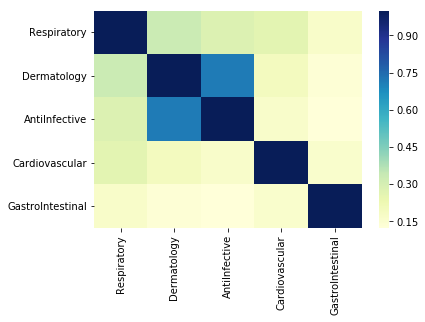

In [5]:
import numpy as np
import seaborn as sns

a = np.array(mat)
df = pd.DataFrame(a, columns=mapping.keys(), index=mapping.keys())
df.head()
ax = sns.heatmap(df, cmap="YlGnBu")